<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto-" data-toc-modified-id="Descripción-del-proyecto--0">Descripción del proyecto <a id="desc" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Descripción-de-datos-" data-toc-modified-id="Descripción-de-datos--0.1">Descripción de datos <a id="desc_datos" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Dataset-contract-" data-toc-modified-id="Dataset-contract--0.1.1">Dataset contract <a id="contract" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Tratamiento-de-datos-de--df_contract" data-toc-modified-id="Tratamiento-de-datos-de--df_contract-0.1.1.1">Tratamiento de datos de  df_contract</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-0.1.1.2">Conclusión</a></span></li></ul></li><li><span><a href="#Dataset-personal" data-toc-modified-id="Dataset-personal-0.1.2">Dataset personal<a id="per" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Tratamiento-de-datos-de-df_personal" data-toc-modified-id="Tratamiento-de-datos-de-df_personal-0.1.2.1">Tratamiento de datos de df_personal</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-0.1.2.2">Conclusión</a></span></li></ul></li><li><span><a href="#Dataset-internet-" data-toc-modified-id="Dataset-internet--0.1.3">Dataset internet <a id="inter" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Tratamiento-de-datos-df_internet" data-toc-modified-id="Tratamiento-de-datos-df_internet-0.1.3.1">Tratamiento de datos df_internet</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-0.1.3.2">Conclusión</a></span></li></ul></li><li><span><a href="#Dataset-phone" data-toc-modified-id="Dataset-phone-0.1.4">Dataset phone<a id="phone" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Tratamientos-de-datos-df_phone" data-toc-modified-id="Tratamientos-de-datos-df_phone-0.1.4.1">Tratamientos de datos df_phone</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-0.1.4.2">Conclusión</a></span></li></ul></li></ul></li><li><span><a href="#Creación-de-tabla-general-" data-toc-modified-id="Creación-de-tabla-general--0.2">Creación de tabla general <a id="gt" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Tratamiento-de-datos" data-toc-modified-id="Tratamiento-de-datos-0.2.1">Tratamiento de datos<a id="tr1" rel="nofollow"></a></a></span></li></ul></li></ul></li><li><span><a href="#Análisis-exploratorio-" data-toc-modified-id="Análisis-exploratorio--1">Análisis exploratorio <a id="ae" rel="nofollow"></a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-1.0.1">Conclusión</a></span></li></ul></li></ul></li><li><span><a href="#Modelos-de-machine-learning" data-toc-modified-id="Modelos-de-machine-learning-2">Modelos de machine learning</a></span><ul class="toc-item"><li><span><a href="#Elección-de-carácteristicas" data-toc-modified-id="Elección-de-carácteristicas-2.1">Elección de carácteristicas</a></span></li><li><span><a href="#Modelo-de-árbol-de-decisión" data-toc-modified-id="Modelo-de-árbol-de-decisión-2.2">Modelo de árbol de decisión</a></span></li><li><span><a href="#Modelo-de-bosque-aleatorio" data-toc-modified-id="Modelo-de-bosque-aleatorio-2.3">Modelo de bosque aleatorio</a></span></li><li><span><a href="#Modelo-con-LigthGBM" data-toc-modified-id="Modelo-con-LigthGBM-2.4">Modelo con LigthGBM</a></span></li><li><span><a href="#Modelo-CatboostClassifier" data-toc-modified-id="Modelo-CatboostClassifier-2.5">Modelo CatboostClassifier</a></span></li></ul></li><li><span><a href="#Conclusión-final" data-toc-modified-id="Conclusión-final-3">Conclusión final</a></span></li></ul></div>

# Descripción del proyecto <a id= "desc"></a>

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

**Servicios de Interconnect**

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

## Descripción de datos <a id= "desc_datos"></a>

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

In [1]:
# importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from boruta import BorutaPy

In [2]:
#adquisición de datos
try:
    df_contract = pd.read_csv('datasets/contract.csv')
    df_internet = pd.read_csv('datasets/internet.csv')
    df_personal = pd.read_csv('datasets/personal.csv')
    df_phone = pd.read_csv('datasets/phone.csv')
except:
    df_contract = pd.read_csv('/Git_repository/datasets/contract.csv')
    df_internet = pd.read_csv('/Git_repository/datasets/internet.csv')
    df_personal = pd.read_csv('/Git_repository/datasets/personal.csv')
    df_phone = pd.read_csv('/Git_repository/datasets/phone.csv')

### Dataset contract <a id ="contract"></a>

In [3]:
#Verificación de datos duplicados
print("Dimensión de datos:", df_contract.shape)
print("Datos duplicados:", df_contract.duplicated().sum(), "\n")

#Resumen del dataframe
df_contract.info()
print()
#visualización de datos
df_contract.head(10)

Dimensión de datos: (7043, 8)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


#### Tratamiento de datos de  df_contract

En el primer vistazo a nuestra tabla obtuvimos que:
* Nuestra columna `TotalCharges` existen datos sin valor (" "),localizados en los registros de clientes más reciente *"2020-02-01"*, quienes aún no han tenido su primera fecha de corte, estos valores vacios serán sustituidos por la cantidad de 0. El tipo de datos es el incorrecto se cambiaran por un tipo flotante
 * Cambio de tipo de datos de la columnas `BeginDate` a datetime.
 * La columna`EndTime` nos dice si el cliente cuenta con algún servicio o ya no, primero la cambiaremos de tipo  a datetime y crearemos la columna `churn` donde que estará representada por False y True indicando que clientes siguen y cuales no.
* Columna `PaperlessBilling` cambiaremos los valores a boleanos

In [4]:
# Cambiar valores nulos por 0 y Cambi0 valores a tipo float
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(" ", '0').map(float)

# Cambio a tipo datetime columna BeginDate
df_contract['BeginDate'] = df_contract['BeginDate'].astype('datetime64[ns]')

# Creación de columna churn por True y False
df_contract['Churn'] = [False  if element == 'No' else True for element in df_contract['EndDate']]

# Cambio a tipo datetime columna EndDate
df_contract['EndDate'] = df_contract['EndDate'].transform(lambda x:"2020-02-01 00:00:00" if x=='No' else  x).astype('datetime64[ns]')

# Cambio a valores booleanos
df_contract['PaperlessBilling']=df_contract['PaperlessBilling'].replace({'Yes':True, 'No':False})

Observemos los cambios realizados, después utilizaremos el metodo describe para ver la disttribución de nuestros valores y averiguaremos otros datos

In [5]:
#Resumen del dataframe
df_contract.info()
print()
#visualización de datos
df_contract.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   bool          
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   bool          
dtypes: bool(2), datetime64[ns](2), float64(2), object(3)
memory usage: 399.0+ KB



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,2017-04-01,2020-02-01,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,2016-05-01,2020-02-01,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,True,Electronic check,70.70,151.65,True
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,True,Electronic check,99.65,820.50,True
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,True,Credit card (automatic),89.10,1949.40,False
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,False,Mailed check,29.75,301.90,False
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,True,Electronic check,104.80,3046.05,True
9,6388-TABGU,2014-12-01,2020-02-01,One year,False,Bank transfer (automatic),56.15,3487.95,False


In [6]:
#visualización de estadísticas
df_contract.describe()

,BeginDate,EndDate,MonthlyCharges,TotalCharges
count,7043,7043,7043.000000,7043.000000
mean,2017-04-30 13:01:50.918642688,2020-01-11 12:56:19.696152320,64.761692,2279.734304
min,2013-10-01 00:00:00,2019-10-01 00:00:00,18.250000,0.000000
25%,2015-06-01 00:00:00,2020-01-01 00:00:00,35.500000,398.550000
50%,2017-09-01 00:00:00,2020-02-01 00:00:00,70.350000,1394.550000
75%,2019-04-01 00:00:00,2020-02-01 00:00:00,89.850000,3786.600000
max,2020-02-01 00:00:00,2020-02-01 00:00:00,118.750000,8684.800000
std,NaN,NaN,30.090047,2266.794470


In [7]:
# Valores unicos
print('Modalidades de pago:', df_contract.Type.unique())  # tipo de contrato
print()
print('Métodos de pago:', df_contract.PaymentMethod.unique())  # tipo de método de pago

Modalidades de pago: ['Month-to-month' 'One year' 'Two year']

Métodos de pago: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
# total de cancelaciones
print('Total de cancelaciones a lo largo de los años:', sum(df_contract['Churn']))
print('Porcentaje de cancelacion a lo largo de los años: {:.2%}'.format(sum(df_contract['Churn']/len(df_contract))))

Total de cancelaciones a lo largo de los años: 1869
Porcentaje de cancelacion a lo largo de los años: 26.54%


#### Conclusión

Esta tabla contiene la información de 7043 usuarios con 8 columnas más una creada ("Churn") en donde presentan el inicio el contrato con la empresa de algún servicio, si aún cuentan con el servicio, los cargos mensuales, el tipo de contrato, el método de pago.
 Una información que podría no ser relevante es si su estado de cuenta se envía digital o físico.
Existían algunas columnas con el tipo de datos incorrectos: `BeginDate` y `TotalCharges`, la columna `EndDate` nos indica si aún tiene vigente el servicio por lo que se creo una nueva columna llamada `Churn` de valores boleanos, donde False indicará que tiene el servicio y True que ya no.

En las columnas `Type` contamos con 3 modalidades de pago: "Month-to-month", "One year", "Two year" y en la columna `PaymentMethod` hay 4 métodos de pagos: "Electronic check", "Mailed check", "Bank transfer (automatic)".

En las estadísticas observamos los cargos mensuales van del rango de \\$18.25 a \\$118.75 , los cargos totales de \\$0 a \\$8684.80 que comprende un rango de 7 años(2013 - 2020)

Por último tenemos un total de 1869 clientes cancelados en un periodo de 7 años lo que representa un poco más de la cuarta parte de clientes en ese periodo.

### Dataset personal<a id = 'per'></a>

In [9]:
# Dimensión de tabla
print("Dimensión de datos:", df_personal.shape)
# Verificación de datos duplicados
print("Datos duplicados:", df_personal.duplicated().sum(), "\n")

# Resumen del dataframe
df_personal.info()
print()
# visualización de datos
df_personal.head(10)

Dimensión de datos: (7043, 5)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


#### Tratamiento de datos de df_personal

Como no se cuentan con valores nulos, ni duplicados y los tipos de datos son correctos unicamente cambiaremos los Yes y No de las columnas `Partner`, `Dependets` y `SeniorCitizen` por True o False

In [10]:
# Cambiando a valores boleanos columnas Partner y Dependents
df_personal = df_personal.replace({'Yes': True, 'No':False, 1: True, 0:False})

# Dataset con valores cambiados
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,False,True,False
1,5575-GNVDE,Male,False,False,False
2,3668-QPYBK,Male,False,False,False
3,7795-CFOCW,Male,False,False,False
4,9237-HQITU,Female,False,False,False
5,9305-CDSKC,Female,False,False,False
6,1452-KIOVK,Male,False,False,True
7,6713-OKOMC,Female,False,False,False
8,7892-POOKP,Female,False,True,False
9,6388-TABGU,Male,False,False,True


#### Conclusión

Este dataset cuenta con 7043 datos, la misma cantidad de datos que con el dataset de contract con únicamente 5 columnas, aqui nos proporciona datos del sexo del cliente, si tiene pareja o si tiene dependientes. No existen valores nulos ni duplicados.

Las valores de las columnas `Parnert` y `Dependents` fueron cambiados por True y False

### Dataset internet <a id='inter'></a>

In [11]:
# Dimensión de tabla
print("Dimensión de datos:", df_internet.shape)

# Verificación de datos duplicados
print("Datos duplicados:", df_internet.duplicated().sum(), "\n")

# Resumen del dataframe
df_internet.info()
print()

# visualización de datos
df_internet.head(10)

Dimensión de datos: (5517, 8)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


#### Tratamiento de datos df_internet

Tenemos menos datos que en los datasets anteriores, sin embargo no tenemos valores nulos o duplicados.

In [12]:
# Cambiando a valores boleanos columnas con Yes y No
df_internet = df_internet.replace({'Yes': True, 'No':False})

# Dataset con valores cambiados
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,False,True,False,False,False,False
1,5575-GNVDE,DSL,True,False,True,False,False,False
2,3668-QPYBK,DSL,True,True,False,False,False,False
3,7795-CFOCW,DSL,True,False,True,True,False,False
4,9237-HQITU,Fiber optic,False,False,False,False,False,False
5,9305-CDSKC,Fiber optic,False,False,True,False,True,True
6,1452-KIOVK,Fiber optic,False,True,False,False,True,False
7,6713-OKOMC,DSL,True,False,False,False,False,False
8,7892-POOKP,Fiber optic,False,False,True,True,True,True
9,6388-TABGU,DSL,True,True,False,False,False,False


#### Conclusión

Este conjunto de datos cuenta con 5517 datos y 8 columnas, donde se describe que tipo de servicio de internet tiene y que otros servicios tienen contratados, no existen valores nulos y los tipos de datos son correctos.

Todas las columnas que contienen valores de "Yes" o "No" fueron cambiadas por True O False

### Dataset phone<a id= 'phone'></a> 

In [13]:
# Dimensión de tabla
print("Dimensión de datos:", df_phone.shape)
# Verificación de datos duplicados
print("Datos duplicados:", df_phone.duplicated().sum(), "\n")

# Resúmen del dataframe
df_phone.info()
print()

# visualización de datos
df_phone.head(10)

Dimensión de datos: (6361, 2)
Datos duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


#### Tratamientos de datos df_phone

El único trabajo a realizar es cambiar los valores de la columna `MultipleLines` por valores boleanos

In [14]:
# Cambiando a valores boleanos columnas con Yes y No
df_phone = df_phone.replace({'Yes': True, 'No':False})

# Dataset con valores cambiados
df_phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,False
1,3668-QPYBK,False
2,9237-HQITU,False
3,9305-CDSKC,True
4,1452-KIOVK,True
5,7892-POOKP,True
6,6388-TABGU,False
7,9763-GRSKD,False
8,7469-LKBCI,False
9,8091-TTVAX,True


#### Conclusión

En este dataframe solo tenemos 6361 datos y 2 columnas, el ID del cliente y si tiene contratado multiples líneas. Al igual que en casos anteriores los valores de "Yes" y "No" Fueron sustituidos por valores boleanos

## Creación de tabla general <a id = 'gt'></a>

A continuación se uniran todos los datasets anteriores, al tener datasets en con menos datos en algunos de ellos nos generaran valores nulos en las distintas columnas para algunos clientes.

In [15]:
# Unión de tablas
df = df_contract.copy()
for data in [df_personal, df_internet, df_phone]:
    df = df.merge(data, how='left', on='customerID')

#Dimensión del data
print('Dimensión de la tabla:', df.shape)
# Visualización de nuevo data
df.head()

Dimensión de la tabla: (7043, 21)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,True,Electronic check,29.85,29.85,False,Female,...,True,False,DSL,False,True,False,False,False,False,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,False,Mailed check,56.95,1889.50,False,Male,...,False,False,DSL,True,False,True,False,False,False,False
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,True,Mailed check,53.85,108.15,True,Male,...,False,False,DSL,True,True,False,False,False,False,False
3,7795-CFOCW,2016-05-01,2020-02-01,One year,False,Bank transfer (automatic),42.30,1840.75,False,Male,...,False,False,DSL,True,False,True,True,False,False,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,True,Electronic check,70.70,151.65,True,Female,...,False,False,Fiber optic,False,False,False,False,False,False,False


In [16]:
#Cantidad de valores nulos
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

### Tratamiento de datos<a id= 'tr1'></a>

Al unir nuestras tablas obtuvimos un total de 21 columnas y contamos en varias de ellas valores nulos resultante de la información que no se tenía en las tablas de df_internet y df_phone.

Antes de tratarla agregaremos una nueva columna que contrendra "True" o "False" si existe algún valor nulo en la información del cliente a partir de la columna `InternetService` que es en donde tenemos dichos valores.

In [17]:
#  Agregando columnas nuevas en donde existen valores nulos
for i in range(13,21):
    df[df.columns[i]+'_nan']=df.iloc[::,i].isnull()    

# Visualización de información
df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines',
       'InternetService_nan', 'OnlineSecurity_nan', 'OnlineBackup_nan',
       'DeviceProtection_nan', 'TechSupport_nan', 'StreamingTV_nan',
       'StreamingMovies_nan', 'MultipleLines_nan'],
      dtype='object')

In [18]:
# Visualización de tabla
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingMovies,MultipleLines,InternetService_nan,OnlineSecurity_nan,OnlineBackup_nan,DeviceProtection_nan,TechSupport_nan,StreamingTV_nan,StreamingMovies_nan,MultipleLines_nan
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,True,Electronic check,29.85,29.85,False,Female,...,False,NaN,False,False,False,False,False,False,False,True
1,5575-GNVDE,2017-04-01,2020-02-01,One year,False,Mailed check,56.95,1889.50,False,Male,...,False,False,False,False,False,False,False,False,False,False
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,True,Mailed check,53.85,108.15,True,Male,...,False,False,False,False,False,False,False,False,False,False
3,7795-CFOCW,2016-05-01,2020-02-01,One year,False,Bank transfer (automatic),42.30,1840.75,False,Male,...,False,NaN,False,False,False,False,False,False,False,True
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,True,Electronic check,70.70,151.65,True,Female,...,False,False,False,False,False,False,False,False,False,False


A continuación haremos una lista de las columnas con valores nulos las cuales trataremos de imputar

In [19]:
# Obtención de los nombre de las columnas en dataset internet con valores vacios
missing_values_columns = df_internet.drop('customerID', axis=1).columns.to_list()
# Agregamos la columna con valores nulos del dataset phone
missing_values_columns.append('MultipleLines')

In [20]:
# Creación de tabla para relleno de valores nulos
df_mode = (df.groupby('MonthlyCharges')[missing_values_columns]
           .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
           .reset_index()
          )

# Visualización de la tabla
df_mode.head()

,MonthlyCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,18.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,18.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,18.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,18.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,18.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [21]:
# Creación de función
def fill_values(df, data, column):
    column_1 = df['MonthlyCharges']
    if pd.isna(df[column]):
        return data.loc[(data['MonthlyCharges'] == column_1), column].values[0]
    else:
        return df[column]

In [22]:
# Aplicación de función
for element in missing_values_columns:
    df[element] = df.apply(fill_values, args=(df_mode, element), axis=1)

In [23]:
# Valores nulos presentes
df[missing_values_columns].isna().sum()

InternetService     1302
OnlineSecurity      1302
OnlineBackup        1302
DeviceProtection    1302
TechSupport         1302
StreamingTV         1302
StreamingMovies     1302
MultipleLines        332
dtype: int64

No todos los valores nulos se han podido rellenar con este primer paso debido a que existen algunos valores en los cargos mensuales que son únicos y contiene valores nulos en ese campo. 

Analicemos los valores mínimos y máximos de los precios por tipo de servicio de internet. Esto nos dará un rango de corte en donde podemos reemplazar valores en dichas columnas.



In [24]:
#mínimos y máximos de tipo de servicio de internet
df.groupby('InternetService')['MonthlyCharges'].agg(['min', 'max'])

,min,max
InternetService,,
DSL,23.45,94.80
Fiber optic,67.75,118.75


In [25]:
#Visualización de valores con los cargos min y max por tipo de servicio
df.query(
    "InternetService == 'DSL' and MonthlyCharges == 23.45 or \
    InternetService == 'DSL' and MonthlyCharges == 94.80 or \
    InternetService == 'Fiber optic' and MonthlyCharges == 67.75 or \
    InternetService == 'Fiber optic' and MonthlyCharges == 118.75"
).sort_values(by = 'InternetService')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingMovies,MultipleLines,InternetService_nan,OnlineSecurity_nan,OnlineBackup_nan,DeviceProtection_nan,TechSupport_nan,StreamingTV_nan,StreamingMovies_nan,MultipleLines_nan
3432,8174-TBVCF,2014-04-01,2020-02-01,Two year,True,Credit card (automatic),94.80,6859.05,False,Female,...,True,True,False,False,False,False,False,False,False,False
6074,3797-VTIDR,2019-11-01,2019-12-01,Month-to-month,True,Electronic check,23.45,23.45,True,Male,...,False,NaN,False,False,False,False,False,False,False,True
4556,3750-CKVKH,2019-09-01,2019-11-01,Month-to-month,True,Electronic check,67.75,116.65,True,Male,...,False,False,False,False,False,False,False,False,False,False
4586,7569-NMZYQ,2014-02-01,2020-02-01,Two year,True,Bank transfer (automatic),118.75,8672.45,False,Female,...,True,True,False,False,False,False,False,False,False,False


El precio mínimo de la fibra óptica es de \\$67.75, este es el precio sin contar con algún servicio extra, esto nos indica que todo lo debajo de el se puede catalogar como servicio DSL.Supondremos que debajo de 23.45 no tendrá ninguna clase de servicio adicional.

In [26]:
# Función para relleno de valores

def InternetService_fill(data):
    
    column = data['InternetService']
    charge = data['MonthlyCharges']
    
    if pd.isna(column):
        if charge < 67.75:
            return 'DSL'
        else:
            return column
    else:
        return column


In [27]:
# Relleno de valores
df['InternetService'] = df.apply(InternetService_fill, axis=1 )

Realizando exploración ordenando por pago mensual y utiliando el servicio de DSL se pudo encontar un patron en el cual debajo de los \\$26.90 no se tiene contratado ningun servicio. Otra obsrvación importante es que los valores nulos faltantes están presentes solo en la las filas en donde el servicio de internet es DSL.

Otra exploración realizada fue entre los rangos en el que los clientes tienen el servicio por debajo \\$42.90 tienen lineas multiples y por arriba no.

In [28]:
# Valores nulos en filas donde el servicio sea por fibra óptica
df[df['InternetService'] == 'Fiber optic'][missing_values_columns].isna().sum()

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [29]:
# Imputación de valores nulos
df[df['MonthlyCharges'] <= 26.90] = df.query("MonthlyCharges <=26.90").fillna(False)
df[df['MonthlyCharges'] < 42.90] =  df.query("MonthlyCharges < 42.90").fillna(True)
df[df['MonthlyCharges'] > 42.90] =  df.query("MonthlyCharges >= 42.90").fillna(False)

#Verificación de valores nulos restantes
df[missing_values_columns].isna().sum()

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

Por último agruegaremos dos columnas más en donde tengamos el año de inicio y el año de cancelación, así como el despliegue de una muestra de la tabla y la berificación de todos los tipos de datos sean los correctos.

In [30]:
#Extracción de años
df['BeginYear'] = df.BeginDate.dt.year
df['EndYear'] = df.EndDate.dt.year

# Verificación de tipo de datos
df.dtypes

customerID                      object
BeginDate               datetime64[ns]
EndDate                 datetime64[ns]
Type                            object
PaperlessBilling                  bool
PaymentMethod                   object
MonthlyCharges                 float64
TotalCharges                   float64
Churn                             bool
gender                          object
SeniorCitizen                     bool
Partner                           bool
Dependents                        bool
InternetService                 object
OnlineSecurity                  object
OnlineBackup                    object
DeviceProtection                object
TechSupport                     object
StreamingTV                     object
StreamingMovies                 object
MultipleLines                   object
InternetService_nan               bool
OnlineSecurity_nan                bool
OnlineBackup_nan                  bool
DeviceProtection_nan              bool
TechSupport_nan          

Nuestras columnas que van desde `OnlineSecurity` hasta `MultipleLines` tienen el tipo de datos "object" a continuación las transformaremos a tipo boleano

In [31]:
# Cambio a tipo boleano
for i in range(14,21):
    df[df.columns[i]]=df.iloc[::,i].astype('bool')

# Muestra de información
df.info()

# Visualización de la tabla
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerID            7043 non-null   object        
 1   BeginDate             7043 non-null   datetime64[ns]
 2   EndDate               7043 non-null   datetime64[ns]
 3   Type                  7043 non-null   object        
 4   PaperlessBilling      7043 non-null   bool          
 5   PaymentMethod         7043 non-null   object        
 6   MonthlyCharges        7043 non-null   float64       
 7   TotalCharges          7043 non-null   float64       
 8   Churn                 7043 non-null   bool          
 9   gender                7043 non-null   object        
 10  SeniorCitizen         7043 non-null   bool          
 11  Partner               7043 non-null   bool          
 12  Dependents            7043 non-null   bool          
 13  InternetService   

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,InternetService_nan,OnlineSecurity_nan,OnlineBackup_nan,DeviceProtection_nan,TechSupport_nan,StreamingTV_nan,StreamingMovies_nan,MultipleLines_nan,BeginYear,EndYear
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,True,Electronic check,29.85,29.85,False,Female,...,False,False,False,False,False,False,False,True,2020,2020
1,5575-GNVDE,2017-04-01,2020-02-01,One year,False,Mailed check,56.95,1889.50,False,Male,...,False,False,False,False,False,False,False,False,2017,2020
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,True,Mailed check,53.85,108.15,True,Male,...,False,False,False,False,False,False,False,False,2019,2019
3,7795-CFOCW,2016-05-01,2020-02-01,One year,False,Bank transfer (automatic),42.30,1840.75,False,Male,...,False,False,False,False,False,False,False,True,2016,2020
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,True,Electronic check,70.70,151.65,True,Female,...,False,False,False,False,False,False,False,False,2019,2019


Ahora tenemos una tabla sin valores nulos y con los tipos de datos correctos, además se agruegaron algunas columnas adicionales, terminando con una tabla de 7043 datos con 31 columnas

# Análisis exploratorio <a id = 'ae'></a>

En esta sección presentaremos las siguientes gráficas

* Balanceo en los datos en la variable objetivo
* Cantidad de inscripciones y cancelaciones por año
* Visualización de cancelaciones de acuerdo a ciertas características.
* La tasa de cancelación a través del tiempo

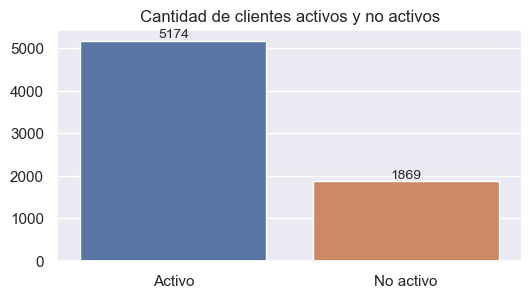

In [32]:
# Verificación de balanceo de variable objetivo

sns.set(rc={'figure.figsize':(6,3)})
ax=sns.barplot(df,
       x=['Activo','No activo'],
       y=df['Churn'].value_counts().values,
      )
plt.title("Cantidad de clientes activos y no activos")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()



Como se puede apreciar en la gráfica anterior, tenemos muchas más inscripciones activas que canceladas

En la siguiente gráfica visualizaremos la tasa de cancelación por año desde su registro, con estro podemos visualizar en que años se han tenido problemas, para ello vamos a crear una nueva tabla donde tomaremos los datos de la columna `customerID`, `BeginYear`, `EndYear` y `Churn`.

In [33]:
# Creación de una nueva tabla 
df_retain = df[['customerID','BeginYear','EndYear','Churn']].copy()
df_retain['EndYear'] = df_retain['EndYear'].fillna(df_retain['BeginYear'])
# Visualización de la tabla
df_retain.head()

,customerID,BeginYear,EndYear,Churn
0,7590-VHVEG,2020,2020,False
1,5575-GNVDE,2017,2020,False
2,3668-QPYBK,2019,2019,True
3,7795-CFOCW,2016,2020,False
4,9237-HQITU,2019,2019,True


Crearemos dos tablas una nueva donde colocaremos el número de clientes registrados por año y otra en donde obtengamos el número de clientes que cancelan el servicio.

In [34]:
# Tabla con cantidad de clientes por año
customer_size_df= df_retain.groupby('BeginYear').customerID.nunique().reset_index()
customer_size_df.rename(columns = {'customerID':'customerSize'}, inplace = True)

# Tabla con cantidad de cancelaciones por año
custumer_exited_df= df_retain.groupby('EndYear')['Churn'].sum().reset_index()

# Union de tablas
custumer_exited_df = customer_size_df.merge(custumer_exited_df,how = 'left', left_on='BeginYear', right_on='EndYear').drop('EndYear', axis = 1)

# Relleno de valores nulos
custumer_exited_df.fillna(0, inplace = True)

# Visualización de datos
custumer_exited_df

,BeginYear,customerSize,Churn
0,2013,8,0.0
1,2014,1344,0.0
2,2015,852,0.0
3,2016,763,0.0
4,2017,845,0.0
5,2018,1030,0.0
6,2019,1957,1409.0
7,2020,244,460.0


Graficaremos la tabla anterior para obtener una representación visual de esta y ver el comportamiento

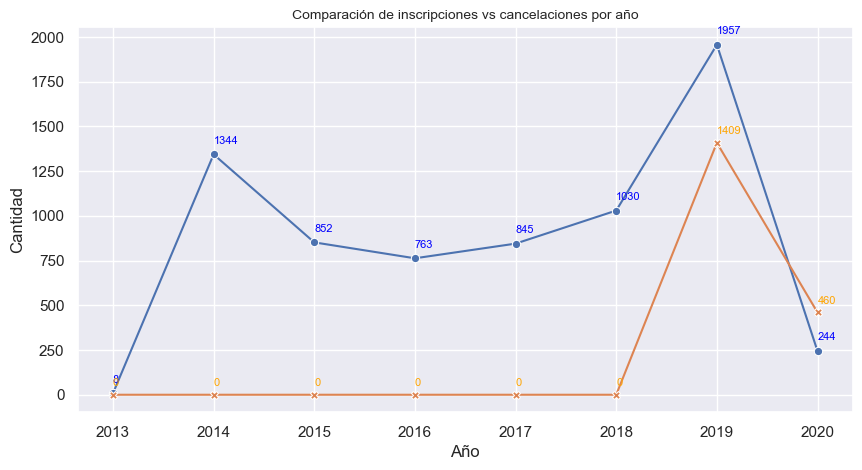

In [35]:
# Lineplot de cantidad de nuevos usuarios y usuarios con cancelaciones.
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=custumer_exited_df,
             x='BeginYear', 
             y='customerSize',
             marker= "o"
            )
for x, y in zip(custumer_exited_df['BeginYear'], custumer_exited_df['customerSize']):
    plt.text(x, y+60, '{:.0f}'.format(y), color='blue',fontsize=8)
    
# Lineplot de cantidad de usuarios no activos    
sns.lineplot(data=custumer_exited_df,
             x='BeginYear', 
             y='Churn',
             marker="X"
            )
for x, y in zip(custumer_exited_df['BeginYear'], custumer_exited_df['Churn']):
    plt.text(x, y+50, '{:.0f}'.format(y), color='orange', fontsize=8)
    
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.title("Comparación de inscripciones vs cancelaciones por año",
         fontsize=10)
plt.show()

En esta tabla podemos observar que el año con más ingresos de usuarios fue en el año de 2019, se aprecia como del 2014 al 2016 se presenta un descenso de inscripcones y a partir de alli empieza a aumentar, para el año 2020 no podemos asegurar que ha dismiuido la cantidad puesto que la información llega hasta febrero. 

Podemos notar como se había mantenido sin bajas hasta el año 2019 en donde se dió un repunte muy alto.

Ahora veremos la cantidad de cancelaciones respecto al tipo de contrato, método de pago, género, si es jubilado, si tiene pareja y si tiene dependientes. Crearemos una pequea función para generar nuestras gráficas

In [36]:
# Función para realización de gráficos
def barplot(column,title,axes):
    sns.barplot(ax=axes,
           data=df.groupby(column)['Churn'].value_counts().reset_index(),
           x=column,
           y='count',
           hue='Churn'
          )
    axes.set_title(title)
    return 
    

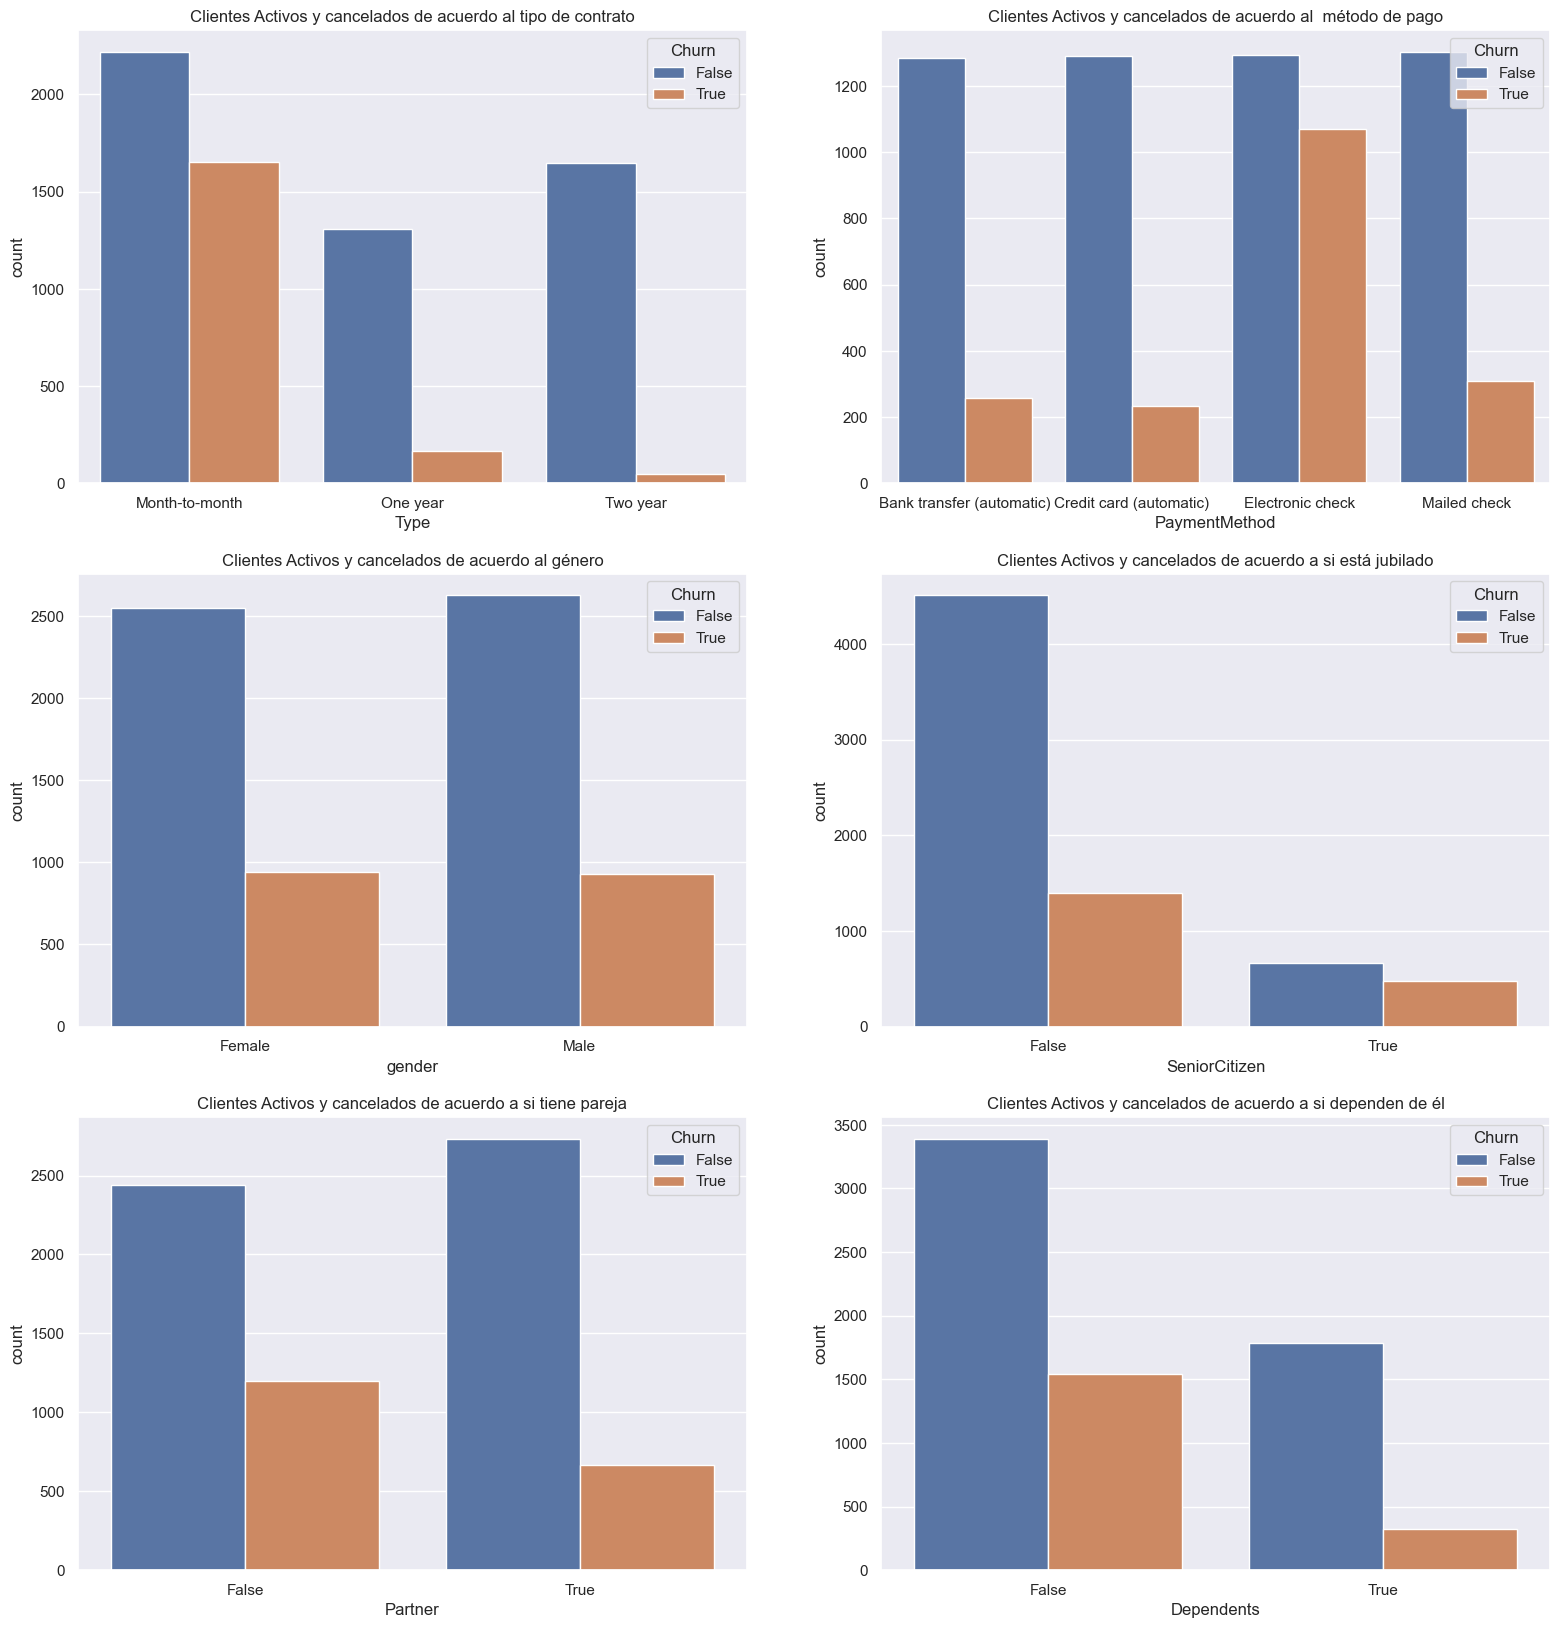

In [37]:
# Listas que contienten las columnas a desplegar y los titulos
column = [['Type','PaymentMethod'], ['gender','SeniorCitizen'],['Partner','Dependents']]
title = [['al tipo de contrato', 'al  método de pago'], ['al género', 'a si está jubilado'], 
         ['a si tiene pareja', 'a si dependen de él']]
# Creación de subplots
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(19,20))
for i in range(3):
    for j in range(2):
        barplot(column[i][j], 
                'Clientes Activos y cancelados de acuerdo '+title[i][j], 
                axes[i, j]
               )

Podemos notar que donde se han presentado más cancelaciones son: en contratos de pago mensual, cheque electrónico como método de pago, si no están jubilados, si cuentan con pareja y si tienen personas que dependan de ellos, en cuanto al genero observamos que es bastante parejo.

A continuación calcularemos la retención por años contando la cantidad de usuarios de la diferencia de clientes activos y que han cancelado entre el final y el inicio del contrato, aquí estará topado hasta el 2020  año máximo de nuestro dataset. Para ello crearemos una nueva tabla para guardar dichos valores y uniremos de la tabla **custumer_exited_df** la columna de `customerSize`

In [38]:
# Cálculo del tiempo de vida de contratos de los clientes
df_retain['CohortLifetime']=df_retain['EndYear']-df_retain['BeginYear']

# Creación de nueva tabla con la cuenta de usuarios unicos
cohorts = df_retain.pivot_table(index = ['BeginYear','CohortLifetime','Churn'], 
                         aggfunc = {'customerID':'nunique'}).reset_index()
cohorts = cohorts[cohorts['Churn']==True].drop('Churn',axis=1)
# Tabla agrupada por año de inicio del cliente y por años en el servicio
cohorts=cohorts.pivot_table(index='BeginYear', columns='CohortLifetime', values = 'customerID').reset_index()
# Agregamos el valor inicial de los clientes
cohorts[0] = customer_size_df['customerSize']
# Rellenamos valores nulos con 0
cohorts.fillna(0,inplace=True)
# Visualización
cohorts

CohortLifetime,BeginYear,0,1,2,3,4,5,6
0,2013,8,0.0,0.0,0.0,0.0,0.0,8.0
1,2014,1344,0.0,0.0,0.0,0.0,70.0,28.0
2,2015,852,0.0,0.0,0.0,100.0,23.0,0.0
3,2016,763,0.0,0.0,111.0,34.0,0.0,0.0
4,2017,845,0.0,153.0,46.0,0.0,0.0,0.0
5,2018,1030,242.0,73.0,0.0,0.0,0.0,0.0
6,2019,1957,256.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Calculo de porcentaje de cancelaciones
for i in range (0,7):
    for j in range(7,1,-1):
        cohorts.iloc[i,j] = cohorts.iloc[i,j]/cohorts.iloc[i,1]
        
# Visualización de datos
cohorts[0] = 0

# Cambio de índice
cohorts=cohorts.set_index('BeginYear')
# Visualización de datos
cohorts

CohortLifetime,0,1,2,3,4,5,6
BeginYear,,,,,,,
2013,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2014,0,0.000000,0.000000,0.000000,0.000000,0.052083,0.020833
2015,0,0.000000,0.000000,0.000000,0.117371,0.026995,0.000000
2016,0,0.000000,0.000000,0.145478,0.044561,0.000000,0.000000
2017,0,0.000000,0.181065,0.054438,0.000000,0.000000,0.000000
2018,0,0.234951,0.070874,0.000000,0.000000,0.000000,0.000000
2019,0,0.130812,0.000000,0.000000,0.000000,0.000000,0.000000


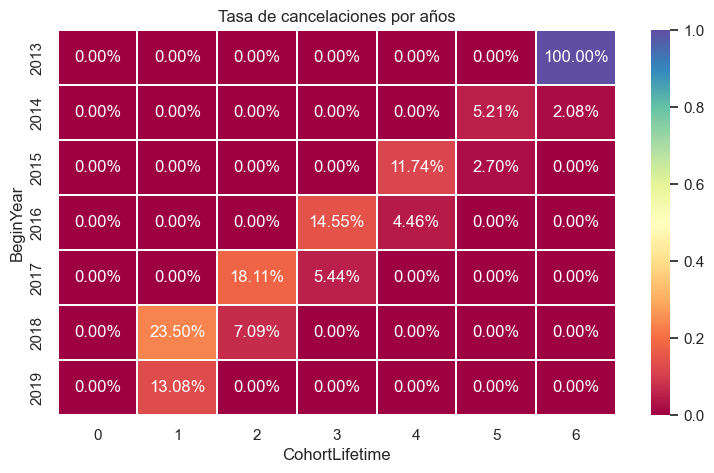

In [40]:
# Gráfica de cancelaciones por año
plt.figure(figsize=(9, 5))
plt.title('Tasa de cancelaciones por años')
sns.heatmap(cohorts, 
            annot=True, 
            fmt='.2%', 
            linewidths= .1,
            linecolor='white',
            cmap='Spectral'); 

Observamos que los clientes captados en 2013 ya no existe alguno, mientras que el año con menor tasa de cancelación ha sido el 2014.Los clientes del año 2018 cancelaron casí una cuarta parte en el primer año de contratación del servicio.Finalmente los clientes de los años 2015, 2016, 2017 y 2019 ha habido una tasa de cancelación de más del 10%. 

### Conclusión

Como pudimos apreciar en la gráfica de "Comparación de inscripciones vs cancelaciones por año" las cancelaciones empezaron a partir del 2019 con un pico grande por lo que habría que estudiar que es lo que sucedió ese año, si hubo un incremento de precios en las tarifas que no gustó mucho a los clientes, una mala estrategía de markting, problemas con los servicios o soporte técnico, competencia con otras compañias, entre otras posibles razónes.

Tambíen descubrimos algo interesante que las personas que no están jubiladas son más propensas a cancelar puede ser debido a que pudiran ser más concientes de lo que las compañias ofrecen y el trata en el servicio ante problemas.

Por último notamos que ya no existen clientes del año 2013 y que los clientes del año 2018 tuvieron una tasa de cancelación de casi una cuarta parte de los contratos nuevos de ese año.

# Modelos de machine learning

## Elección de carácteristicas 

Empecemos por descartar como primer paso caracteristicas no sean relevantes para el modelado como son las columnas de  `customerID` y nuestras columnas `BeginDate` y `EndDate`, conservaremos las columnas de los años de inicio y fin.

Transformaremos nuestras columnas categóricas con el método ordinalencoder.Aplicaremos el método de "Boruta" para verificar si el resto de las caracteristicas son necesarias. Una vez teniendo nuestras características dividiremos nuestro data en proporción 75:25 para nuestros datos de prueba y entrenamiento


In [41]:
# Eliminación de características
df_model = df.drop(['customerID', 'BeginDate', 'EndDate'],axis=1).copy()

# Visualización
df_model.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,InternetService_nan,OnlineSecurity_nan,OnlineBackup_nan,DeviceProtection_nan,TechSupport_nan,StreamingTV_nan,StreamingMovies_nan,MultipleLines_nan,BeginYear,EndYear
0,Month-to-month,True,Electronic check,29.85,29.85,False,Female,False,True,False,...,False,False,False,False,False,False,False,True,2020,2020
1,One year,False,Mailed check,56.95,1889.50,False,Male,False,False,False,...,False,False,False,False,False,False,False,False,2017,2020
2,Month-to-month,True,Mailed check,53.85,108.15,True,Male,False,False,False,...,False,False,False,False,False,False,False,False,2019,2019
3,One year,False,Bank transfer (automatic),42.30,1840.75,False,Male,False,False,False,...,False,False,False,False,False,False,False,True,2016,2020
4,Month-to-month,True,Electronic check,70.70,151.65,True,Female,False,False,False,...,False,False,False,False,False,False,False,False,2019,2019


In [42]:
# Codificación de variables categóricas
encoder = OrdinalEncoder()
df_model[df_model.select_dtypes('object').columns] = encoder.fit_transform(df_model.select_dtypes('object'))

# División en características y objetivos
features = df_model.drop('Churn', axis=1)
target = df_model['Churn']

In [43]:
%time
# Creación de objeto con randomforest
clf = RandomForestClassifier(max_depth=5, n_jobs=-1)

# Creación del objeto boruta y entrenamiento
boruta = BorutaPy(estimator=clf,
                 n_estimators='auto',
                 max_iter=50)
boruta.fit(np.array(features), np.array(target))
features_accepted = features.columns[boruta.support_].to_list()
# Visualización de caracteristicas aceptadas y no decididas por boruta
features = features[features_accepted] 
features.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  7043 non-null   float64
 1   PaperlessBilling      7043 non-null   bool   
 2   PaymentMethod         7043 non-null   float64
 3   MonthlyCharges        7043 non-null   float64
 4   TotalCharges          7043 non-null   float64
 5   InternetService       7043 non-null   float64
 6   OnlineSecurity        7043 non-null   bool   
 7   OnlineBackup          7043 non-null   bool   
 8   TechSupport           7043 non-null   bool   
 9   InternetService_nan   7043 non-null   bool   
 10  OnlineSecurity_nan    7043 non-null   bool   
 11  OnlineBackup_nan      7043 non-null   bool   
 12  DeviceProtection_nan  7043 non-null   bool   
 13  TechSupport_nan       7043 non-null   bool   
 14  StreamingTV_nan       7043 non-nu

Hemos descartado 11 de las 30 características que teníamos, ahora dividiremos nuestro conjunto en entrenamiento y pruebas

In [44]:
# División en conjunto de entrenamiento y prueba
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=.25, stratify=target, random_state=42)

print('Tamaño de caracteristicas conjunto de entrenamiento', f_train.shape)
print('Tamaño de caracteristicas conjunto de entrenamiento', f_test.shape)

Tamaño de caracteristicas conjunto de entrenamiento (5282, 18)
Tamaño de caracteristicas conjunto de entrenamiento (1761, 18)


definiremos una función que nos mostrará gráficas de nuestras métricas de puntuación y nos dará un resumen de las puntuaciones obtenidas.

In [45]:
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target.astype(target.dtypes))
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target.astype(target.dtypes))


    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

## Modelo de árbol de decisión

In [46]:
%%time
#Creación del modelo
param_grid = {'criterion':['gini', 'entropy'] ,
              'splitter':['best', 'random'],
              'max_depth':[10, 15,20],
              'min_samples_split':[3,5],
              'min_samples_leaf':[1,3,6],
              'max_features':['sqrt', 'log2'],
              'class_weight':['balanced', None],
              'random_state':[1235]
             }

model_1 = RandomizedSearchCV(DecisionTreeClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=5
                       )

# Entrenamiento
model_1.fit(f_train,t_train)
model_1 = model_1.best_estimator_
model_1

CPU times: total: 484 ms
Wall time: 473 ms


DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=3, random_state=1235,
                       splitter='random')

          train  test
Accuracy   0.94  0.94
F1         0.86  0.86
APS        0.95  0.92
ROC AUC    0.97  0.94


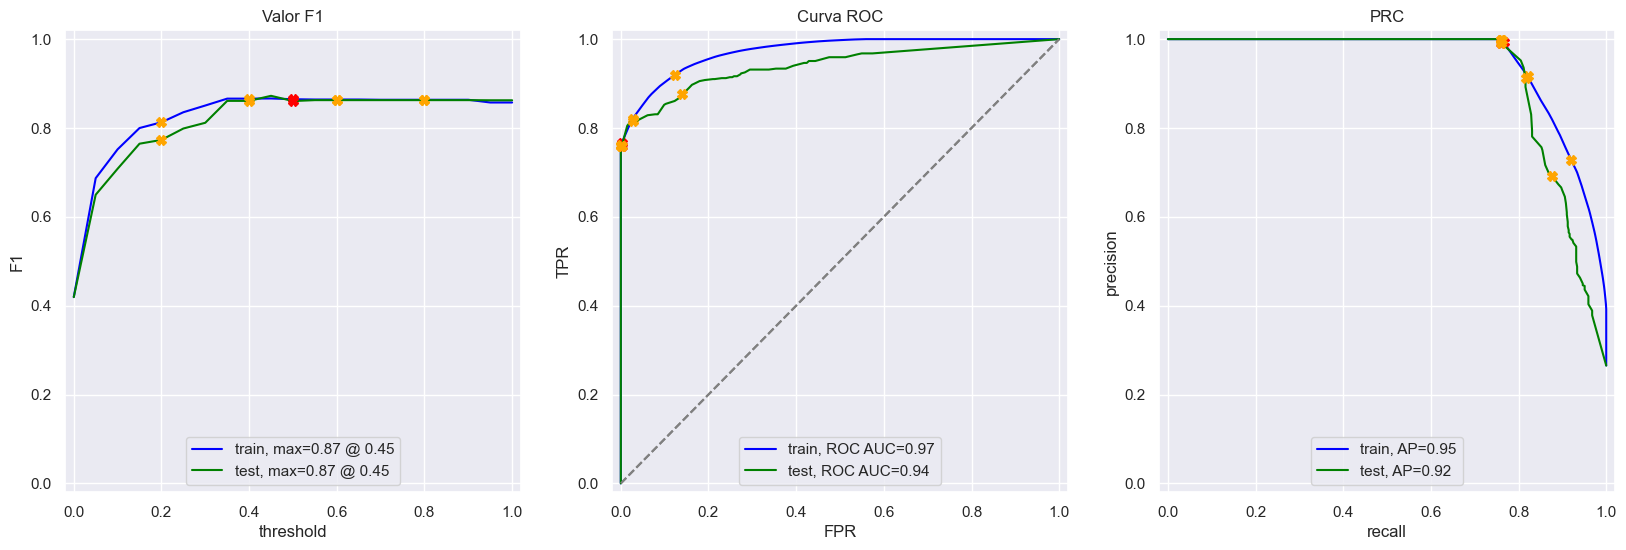

In [47]:
# Evaluación del modelo
evaluate_model(model_1, f_train, t_train, f_test, t_test)

## Modelo de bosque aleatorio

In [48]:
%%time
#Creación del modelo
param_grid = {'n_estimators': [100,150],
              'criterion':['gini', 'entropy'],
              'max_depth': [10, 15,None],
              'min_samples_leaf': [3,12],
              'max_features':['sqrt', 'log2'],
              'class_weight': ['balanced', 'balanced_subsample'],
              'n_jobs': [-1],
              'random_state' : [12345]
             }

model_2 =  RandomizedSearchCV(RandomForestClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=3
                       )

# Entrenamiento
model_2.fit(f_train,t_train)
model_2 = model_2.best_estimator_
model_2

CPU times: total: 10.5 s
Wall time: 11.1 s


RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, min_samples_leaf=3, n_estimators=150,
                       n_jobs=-1, random_state=12345)

          train  test
Accuracy   0.94  0.93
F1         0.89  0.87
APS        0.98  0.95
ROC AUC    0.99  0.96


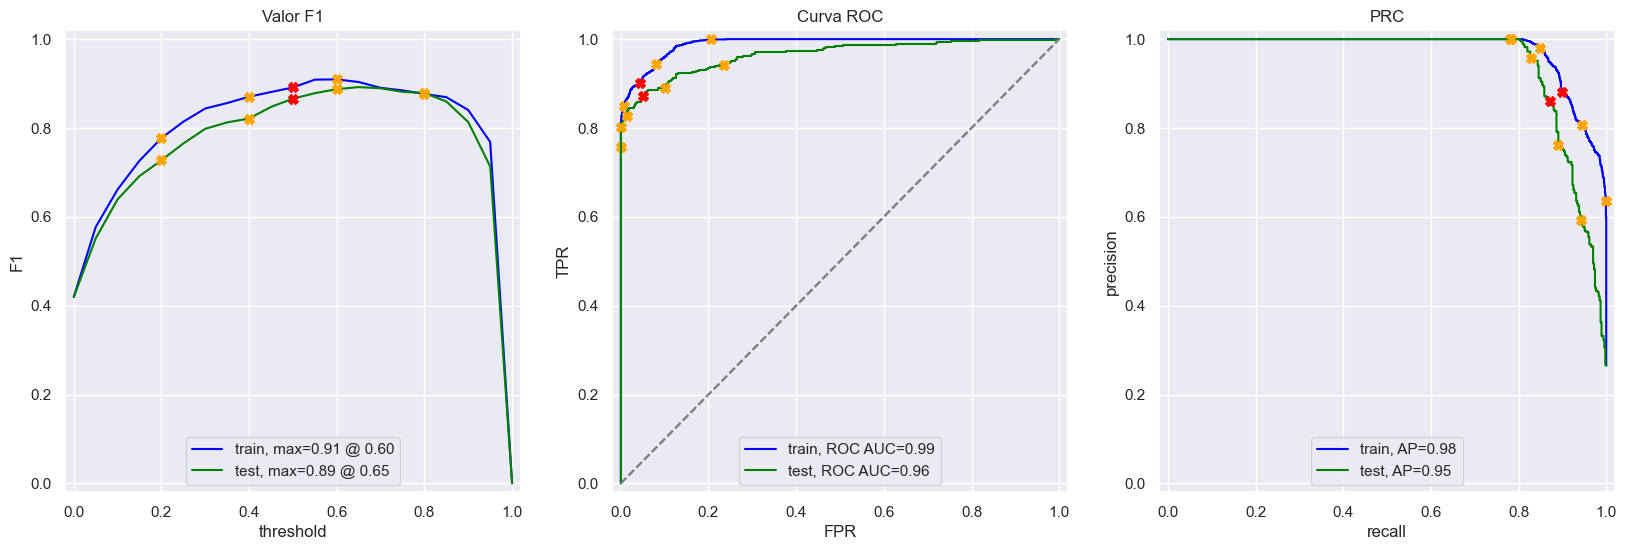

In [49]:
# Evaluación del modelo
evaluate_model(model_2, f_train, t_train, f_test, t_test)

## Modelo con LigthGBM

In [50]:
%%time
# Creación del modelo
param_grid = {'learning_rate': [.01,.05],
              'boosting_type': ['gbdt','goss'],
              'objective': ['binary'],
              'num_leaves': [32,64],
              'max_depth': [15,20],
              'n_estimators': [50,100],
              'class_weight': ['balanced', None],
              'n_jobs': [-1],
              'random_state' : [12345],
              'verbose': [-1]
             }

model_3 = RandomizedSearchCV(LGBMClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=3
                       )

# Entrenamiento
model_3.fit(f_train,t_train)
model_3 = model_3.best_estimator_
model_3


CPU times: total: 28.3 s
Wall time: 3.74 s


LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=20,
               n_estimators=50, n_jobs=-1, num_leaves=32, objective='binary',
               random_state=12345, verbose=-1)

          train  test
Accuracy   0.95  0.95
F1         0.91  0.90
APS        0.97  0.95
ROC AUC    0.98  0.97


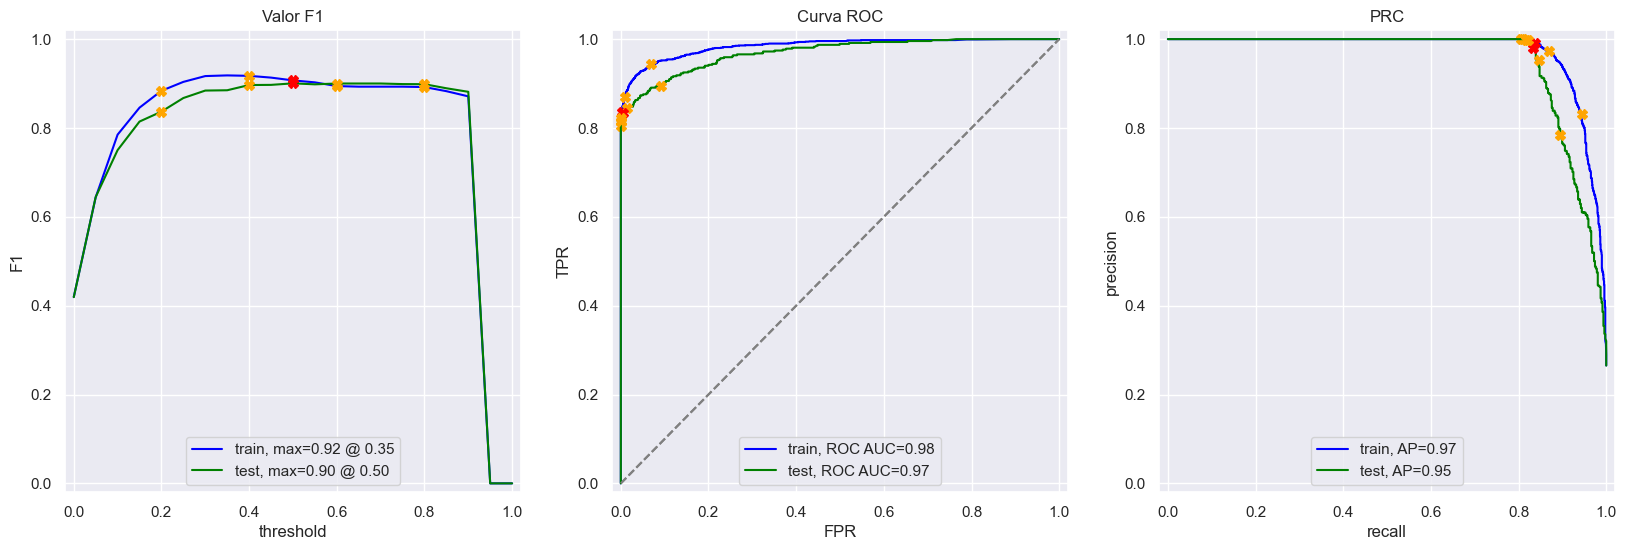

In [51]:
# Evaluación del modelo
evaluate_model(model_3, f_train, t_train, f_test, t_test)

## Modelo CatboostClassifier

Este modelo puede manejar las caracteristicas categóricas, volveremos a crear nuestra variable "features" con las características obtenidas en el método de boruta de nuestra tabla df la cual aún cuenta con nuestras variables categóricas.
Posterior mente dividiremos nuestro conjunto a razón de 75:25.

In [52]:
# Asignación de valores a la variable features
features = df[features_accepted]

# División de conjunto en prueba y entrenamiento
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=.25, stratify=target, random_state=42)

In [53]:
%%time
# Creación del modelo
param_grid = {'iterations': [50,100],
              'learning_rate': [.01,0.05],                                  
              'random_state' : [12345],
              'verbose': [0],
             }

model_4 = GridSearchCV(CatBoostClassifier(), 
                        param_grid, 
                        scoring ='roc_auc',  
                        cv=3
                       )

# Entrenamiento
model_4.fit(f_train,t_train,cat_features = list(features.select_dtypes('object')))
model_4=model_4.best_estimator_
model_4

CPU times: total: 41.8 s
Wall time: 25.3 s


          train  test
Accuracy   0.27  0.27
F1         0.42  0.42
APS        0.96  0.95
ROC AUC    0.97  0.97


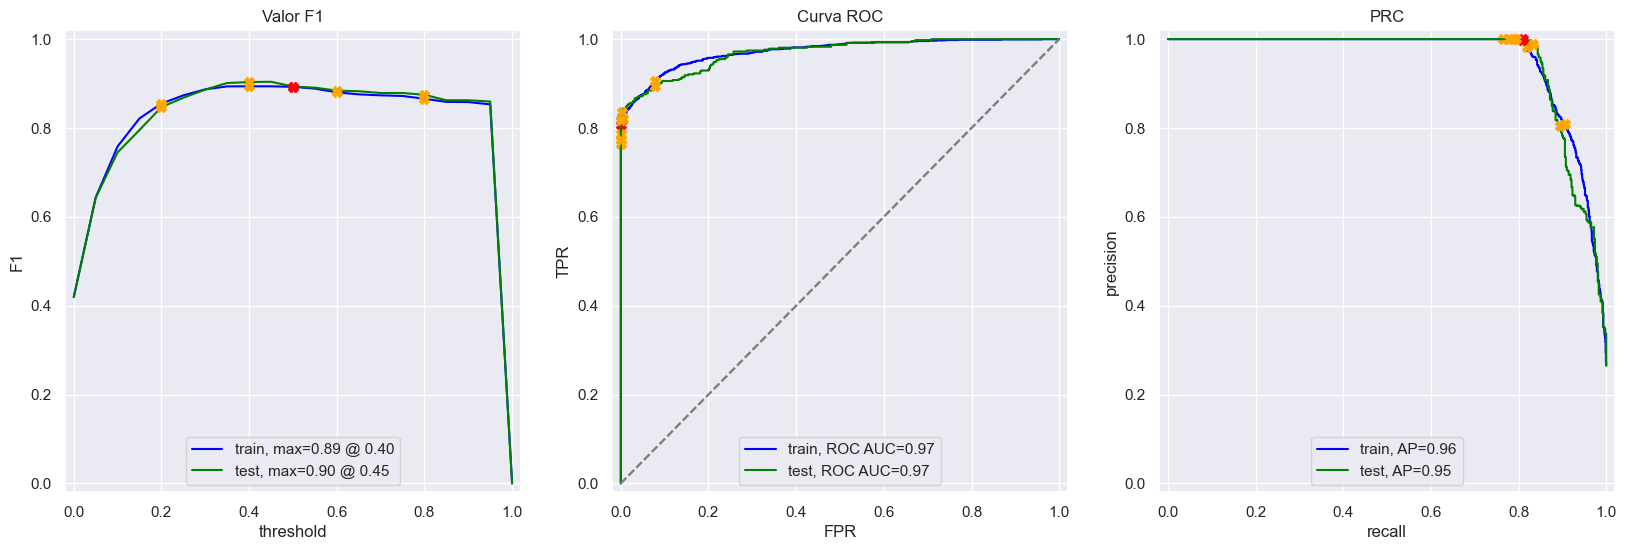

In [54]:
# Evaluación del modelo
evaluate_model(model_4, f_train, t_train, f_test, t_test)

# Conclusión final

Se contaba con 4 datasets en donde contenía información de los clientes, que servicios tenía contratado, sus cargos mensuales, cargos totales, método de pago entre otros. Se unieron todas las tablas para contener todas esas informaciones en una sola, algunas tablas no contaban con todos los ID de los clientes, esto nos generó valores nulos en ciertas columnas las cuales fueron tratadas con diversas estrategias. Algunos columnas no tenian el tipo correcto por lo cual se corrigieron. Para mayor facilidad en las columnas que contaban con palabras de Yes y No se cambiaron por "True" o "False". Tambíen se crearon algunas columnas como la de `Churn` en donde clasificamos que clientes contiuaban y cuales no.

En la parte de exploración realizamos algunos gráficos en donde pudimos observar que nuestra columna objetivo esta desbalanceada, contabamos con más clientes que aún contrataban el servicio respecto a los que no. Pudimos visualizar la cantidad de suscripciones anuales, en donde notamos como del año 2014 al 2016 hubo un descenso, pero recuperandose en los años posteriores. También pudimos notar que las cancelaciones empiezan en 2019 y en su mayoría son a partir de ese año, por lo que se puede pensar que existió alguna estrategía erronea para retener a los clientes o tal vez factores externos como promociones de la competencia, situación económica en general entre otros.

Finalmente construimos 4 modelos de machine learning, previamente realizamos una elección de características aplicando el método de boruta, en donde obtuvimos como resultado que las características relacionadas con información de clientes como el género, si tiene pareja, así como, algunos servicios no tuvieron relevancia.

Como resultados de nuestros modelos obtuvimos que las 4 tienen la metrica de ROC-AUC con un rago de entre .93 a .97 en el conjunto de prueva, se considera como mejor opción el modelo de LigthGBM Clasiffier dado a que tiene un rendimiento bueno y un tiempo de ejcución menor.